#                                AI IMAGE CLASSIFIER

##### This project involved building a machine learning model that can effectively classify real images and those generated by AI. The first step was to create a dataset comprising AI-generated and real images. To accomplish this, pygoogle_image is used , with which images from Google are downloaded. Apart from Google Images, two more datasets are used. Then, a Convulutional Nueral Network based Classifier model was constructed and trained on the dataset containing around 1,00,000 images.

#### First, let's import all the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
from pygoogle_image import image as pi
import random
import PIL
import pickle 

### Web Scraping and Generating a Dataset

##### Here, we used pygoogle_image library to download google images 

In [2]:
pi.download(keywords="ai generated images", limit=100, directory='./ai_generated1/')
pi.download(keywords="ai generated art", limit=100, directory='./ai_generated1/')
pi.download(keywords="ai generated characters", limit=100, directory='./ai_generated1/')
pi.download(keywords='stable diffusion', limit=100, directory='./ai_generated1/')
pi.download(keywords='dalle2 generated images', limit=100, directory='./ai_generated1/')
pi.download(keywords='midjourney', limit=100, directory='./ai_generated1/')
pi.download(keywords='landscapes', limit=100, directory='./real1/')
pi.download(keywords='cityscapes', limit=100, directory='./real1/')
pi.download(keywords='animals', limit=100, directory='./real1/')
pi.download(keywords='vehicles', limit=50, directory='./real1/')
pi.download(keywords='traffic', limit=50, directory='./real1/')
pi.download(keywords='offices', limit=50, directory='./real1/')
pi.download(keywords='real food images', limit=50, directory='./real1/')


[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[=======================================

Since, the data collected from google images is not enought for training a model, we have used two more datasets

1. CIFAKE: Real and AI-Generated Synthetic Images
2. Ai Generated Images | Images Created using Ai from Kaggle

#### Now, we will be pre-processing the data

In [2]:
data = "./dataset_train/"
categories = ['Real', 'AIGenerated']

In [8]:
img_size = 48

In [3]:
img_size = 48
training_data = []

i = 0
for category in categories:
    path = os.path.join(data,category)
    classes = categories.index(category)
    for img in os.listdir(path):
        i = i + 1
        img_array = cv.imread(os.path.join(path,img))
        new_array = cv.resize(img_array, (48,48))
        new_array = new_array/255
        training_data.append([new_array, classes])
        print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [4]:
len(training_data), training_data[0][0].shape

(101031, (48, 48, 3))

In [5]:
random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
1
1
0
1
0
1


In [7]:
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

In [8]:
X_train.shape

(101031, 48, 48, 3)

In [9]:
y_train.shape

(101031,)

In [10]:
X_train[0].shape

(48, 48, 3)

#### Storing X_train and y_train

In [15]:
pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out, protocol=4)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out, protocol=4)
pickle_out.close()

In [16]:
pickle_in = open("X_train.pickle", "rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle", "rb")
y_train = pickle.load(pickle_in)

In [17]:
X_train.shape

(101031, 48, 48, 3)

In [18]:
y_train.shape

(101031,)

## Creating the Model

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential

c:\Users\sansi\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\sansi\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\sansi\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\sansi\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dty

In [22]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (48,48,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         7

## Training the Model

In [24]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
101031/101031 [==============================] - 185s 2ms/sample - loss: 0.4112 - acc: 0.8125
Epoch 2/15
101031/101031 [==============================] - 170s 2ms/sample - loss: 0.2870 - acc: 0.8794
Epoch 3/15
101031/101031 [==============================] - 170s 2ms/sample - loss: 0.2514 - acc: 0.8957
Epoch 4/15
101031/101031 [==============================] - 177s 2ms/sample - loss: 0.2286 - acc: 0.9064
Epoch 5/15
101031/101031 [==============================] - 200s 2ms/sample - loss: 0.2160 - acc: 0.9128
Epoch 6/15
101031/101031 [==============================] - 161s 2ms/sample - loss: 0.2006 - acc: 0.9189
Epoch 7/15
101031/101031 [==============================] - 180s 2ms/sample - loss: 0.1912 - acc: 0.9234
Epoch 8/15
101031/101031 [==============================] - 192s 2ms/sample - loss: 0.1839 - acc: 0.9256
Epoch 9/15
101031/101031 [==============================] - 182s 2ms/sample - loss: 0.1763 - acc: 0.9293
Epoch 10/15
101031/101031 [============================

### Storing the Model

In [38]:
model.save("AIGeneratedModel.h5")

In [5]:
model_new = keras.models.load_model("AIGeneratedModel.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
data = "./dataset_test/"
categories = ['Real', 'AIGenerated']

img_size = 48
testing_data = []

i = 0
for category in categories:
    path = os.path.join(data,category)
    classes = categories.index(category)
    for img in os.listdir(path):
        i = i + 1
        img_array = cv.imread(os.path.join(path,img))
        new_array = cv.resize(img_array, (48,48))
        new_array = new_array/255
        testing_data.append([new_array, classes])
        print(i)
        
random.shuffle(testing_data)

X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


#### On evaluating, the model gave an accuracy of 93.90%

In [9]:
model_new.evaluate(X_test, y_test)

20000/20000 [==============================] - 10s 495us/sample - loss: 0.1597 - acc: 0.9390


[0.159677337372303, 0.93895]

In [16]:
y_pred = model_new.predict(X_test)

In [17]:
X_test.shape

(20000, 48, 48, 3)

In [18]:
y_test.shape

(20000,)

In [19]:
y_pred.shape

(20000, 1)

In [20]:
y_predicted = []

for arr in y_pred:
    if arr[0] <= 0.5:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

y_predicted = np.array(y_predicted)

In [21]:
y_predicted.shape

(20000,)

## Printing the Classification Report

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10000
           1       0.97      0.91      0.94     10000

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



## Testing 

In [19]:
def find_out(path_img):
    img_arr = cv.imread(path_img)
    plt.imshow(img_arr)
    new_arr = cv.resize(img_arr, (48,48))
    new_arr = new_arr/255
    test = []
    test.append(new_arr)
    test = np.array(test).reshape(-1, img_size, img_size, 3)
    y = model_new.predict(test)
    if y[0] <= 0.5:
        print("The given image is Real.")
    else:
        print("The given image is AI Generated.")

The given image is Real.


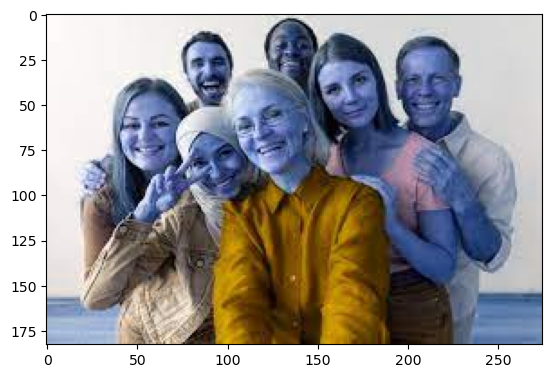

In [12]:
path_img = './Testing/people.jpg'
find_out(path_img)

The given image is Real.


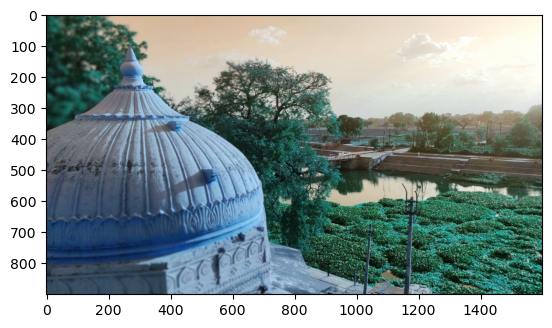

In [34]:
path_img = './Testing/Real.jpeg'
find_out(path_img)

The given image is AI Generated.


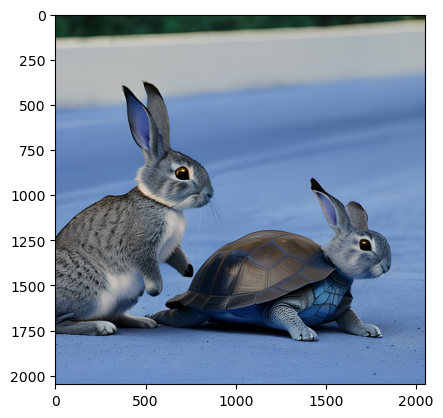

In [35]:
path_img = './Testing/AIGenerated.png'
find_out(path_img)